<a href="https://colab.research.google.com/github/Italoalberto/streaming_invest/blob/main/NLP_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
df = pd.read_csv(f'/content/drive/MyDrive/__Colab Notebooks/Desafio A3Data/id_desc.csv', sep = ',')
df.columns

Index(['id', 'desc'], dtype='object')

Venture Capital de Streaming e quero saber onde vou colocar dinheiro


In [72]:
df.head(30)

,id,desc
0,004c744a-2b82-49b3-a536-90dbb68f368e,Vectra is a cybersecurity platform that uses A...
1,0062d2eb-8210-480a-adef-ec91d0e74855,Roadzen is a global leader in the P&C insuranc...
2,00657562-4dd3-41f9-aceb-df114606bc9e,Restream is a multi-streaming solution that al...
3,00b16654-5d01-4f2f-b6b3-ee2ef13c0d9e,DLP works for 1% of companies; fortunately the...
4,00b4e919-4d10-4ce8-b013-b6cf73ebd780,Shift Technology delivers AI-native decision a...
5,00c83f0f-9a68-4145-8fea-e58f970541c8,Clutch is a Toronto-based technology company t...
6,01569c3d-df62-4033-8539-89bef1a69d34,"FoodLogiQ specializes in supplier management, ..."
7,0169b008-e0a9-4613-ac97-14c28486a38a,3DFortify is an advanced manufacturing startup...
8,0275df14-12b1-4056-99ea-913738197922,"gradient A.I., we’re tackling some of the most..."
9,02e1c98c-c3d7-4b70-b8d3-d0a182dd3ef9,WebPT is a rehab therapy platform designed fo...


In [73]:
len(df)

3617

In [74]:
df = df.dropna()

In [75]:
df.desc = df.desc.astype('str')

<ipython-input-75-b78213d2c3f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.desc = df.desc.astype('str')


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 3616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3553 non-null   object
 1   desc    3553 non-null   object
dtypes: object(2)
memory usage: 83.3+ KB


In [77]:
def extract_topics(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text.lower())

    # Remove stopwords (common words with little semantic value)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = set([token for token in tokens if token not in stop_words])

    # Calculate the frequency distribution of the remaining tokens
    #fdist = FreqDist(filtered_tokens)

    # Extract the most common topics
    #topics = fdist.most_common(7)  # Change the number to extract more or fewer topics

    return filtered_tokens

In [78]:
def remove_punctuation(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens_without_punctuation = [token for token in tokens if token not in string.punctuation]

    # Reconstruct the text without punctuation
    text_without_punctuation = ' '.join(tokens_without_punctuation)

    return text_without_punctuation

In [79]:
df.desc = df.desc.apply(remove_punctuation)

In [80]:
# Apply the extract_topics function to the 'Desc' column and create a new 'Topics' column
df['Topics'] = df['desc'].apply(extract_topics)

# Print the DataFrame with the extracted topics
df[['id', 'Topics']]

,id,Topics
0,004c744a-2b82-49b3-a536-90dbb68f368e,"{incident, devices, ecosystem, stream, lakes, ..."
1,0062d2eb-8210-480a-adef-ec91d0e74855,"{c, partners, resolve, new, assistance, risk, ..."
2,00657562-4dd3-41f9-aceb-df114606bc9e,"{stream, capabilities, using, scheduling, anal..."
3,00b16654-5d01-4f2f-b6b3-ee2ef13c0d9e,"{simple, works, discovers, classifies, compreh..."
4,00b4e919-4d10-4ce8-b013-b6cf73ebd780,"{sullivan, presented, 2020, transactionsto, ac..."
...,...,...
3612,ff774652-6e30-4fd7-ae5e-aa07797e2450,"{manufacturer, management, risks, base, applic..."
3613,ff9a147f-3373-4892-afdd-6d20714c2afe,"{paramount, using, attacks, terrorist, search,..."
3614,ffae68a3-1974-4cf9-bfa3-a4e4e1eea97d,"{provide, centralized-laboratory-accurate, mol..."
3615,ffb9ffdb-6f54-4f32-8104-09d49a5d058b,"{security, devices, tracking, crowds, preventi..."


In [81]:
def streaming_check(Topics):
  if 'streaming' in Topics:
    return True
  else: 
    return False

In [82]:
df['Streaming_companies'] = df['Topics'].apply(streaming_check)

In [83]:
df.head()

,id,desc,Topics,Streaming_companies
0,004c744a-2b82-49b3-a536-90dbb68f368e,Vectra is a cybersecurity platform that uses A...,"{incident, devices, ecosystem, stream, lakes, ...",False
1,0062d2eb-8210-480a-adef-ec91d0e74855,Roadzen is a global leader in the P C insuranc...,"{c, partners, resolve, new, assistance, risk, ...",False
2,00657562-4dd3-41f9-aceb-df114606bc9e,Restream is a multi-streaming solution that al...,"{stream, capabilities, using, scheduling, anal...",False
3,00b16654-5d01-4f2f-b6b3-ee2ef13c0d9e,DLP works for 1 of companies fortunately there...,"{simple, works, discovers, classifies, compreh...",False
4,00b4e919-4d10-4ce8-b013-b6cf73ebd780,Shift Technology delivers AI-native decision a...,"{sullivan, presented, 2020, transactionsto, ac...",False


In [84]:
df['Streaming_companies'].unique()

array([False,  True])

In [85]:
df_streaming = df[df['Streaming_companies']==True]

In [86]:
df_streaming.head()

,id,desc,Topics,Streaming_companies
18,0571df03-f652-431b-b14c-5b963ca745df,Visionular is a next-generation video encoding...,"{using, harness, center, america, tremendous, ...",True
255,8a98a3cc-9642-4df8-b8a6-de84375ce7e8,Firework is an immersive digital transformatio...,"{lightspeed, partners, streaming, transformati...",True
425,ee281756-1555-45a3-b704-a18ae5fbd3f5,Swim provides the first open-core end-to-end p...,"{using, core, 2015, applications, massive, con...",True
837,0b843853-5f2e-46f6-980b-c5972dc4b5b7,Tru Optik identity resolution powers the strea...,"{graph™, ecosystem, streaming, optik, househol...",True
1103,22dbedba-0f12-4ab2-b1cc-99abb16b2455,Mux is building the future of online video inf...,"{stream, best-in-class, detailed, live, discov...",True


In [118]:
len(df_streaming)

21

In [87]:
set1 = df['Topics'][0]

In [88]:
set2 = df['Topics'][1]

In [89]:
intersection = set1.intersection(set2)
print(intersection)

{'use', 'real-time'}


In [94]:
set_streaming = df_streaming.values.tolist()

In [98]:
adj_matrix = []
for i in range(len(set_streaming)):
  reg = []
  for j in range(len(set_streaming)):
    set1 = set_streaming[i][2]
    set2 = set_streaming[j][2]
    peso = len(set1.intersection(set2))
    reg.append(peso)
  adj_matrix.append(reg)

In [99]:
print(adj_matrix)

[[140, 4, 6, 3, 8, 6, 3, 6, 4, 9, 7, 3, 3, 10, 5, 10, 14, 2, 5, 8, 8], [4, 54, 4, 6, 5, 5, 5, 4, 54, 4, 3, 4, 2, 3, 4, 7, 5, 3, 8, 3, 3], [6, 4, 107, 3, 10, 5, 2, 7, 4, 5, 6, 4, 2, 11, 6, 7, 5, 2, 6, 7, 9], [3, 6, 3, 33, 4, 3, 2, 2, 6, 1, 5, 2, 1, 3, 2, 7, 1, 2, 3, 2, 3], [8, 5, 10, 4, 81, 3, 2, 4, 5, 4, 4, 4, 5, 3, 3, 6, 7, 2, 5, 5, 8], [6, 5, 5, 3, 3, 57, 2, 5, 5, 4, 6, 2, 1, 2, 2, 8, 3, 1, 5, 4, 4], [3, 5, 2, 2, 2, 2, 29, 1, 5, 2, 2, 1, 1, 3, 2, 3, 1, 1, 4, 1, 2], [6, 4, 7, 2, 4, 5, 1, 71, 4, 5, 2, 2, 1, 10, 2, 5, 5, 2, 2, 3, 6], [4, 54, 4, 6, 5, 5, 5, 4, 54, 4, 3, 4, 2, 3, 4, 7, 5, 3, 8, 3, 3], [9, 4, 5, 1, 4, 4, 2, 5, 4, 69, 4, 6, 2, 4, 1, 7, 6, 2, 1, 3, 4], [7, 3, 6, 5, 4, 6, 2, 2, 3, 4, 64, 1, 2, 5, 3, 8, 5, 1, 6, 4, 6], [3, 4, 4, 2, 4, 2, 1, 2, 4, 6, 1, 25, 2, 2, 1, 4, 2, 2, 2, 1, 2], [3, 2, 2, 1, 5, 1, 1, 1, 2, 2, 2, 2, 28, 2, 2, 2, 2, 2, 1, 2, 2], [10, 3, 11, 3, 3, 2, 3, 10, 3, 4, 5, 2, 2, 94, 4, 7, 4, 2, 7, 4, 6], [5, 4, 6, 2, 3, 2, 2, 2, 4, 1, 3, 1, 2, 4, 20, 2, 6, 1, 3, 4,

In [113]:
adj_numpy = np.array(adj_matrix)

In [114]:
def plot_graph(adjacency_matrix):
    # Create a networkx graph from the adjacency matrix
    graph = nx.from_numpy_array(adjacency_matrix)

    # Plot the graph
    pos = nx.spring_layout(graph)  # Layout algorithm for node positioning
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.show()

In [121]:
graph = nx.from_numpy_array(adj_numpy)

In [122]:
nx.write_graphml(graph, "graph.graphml")

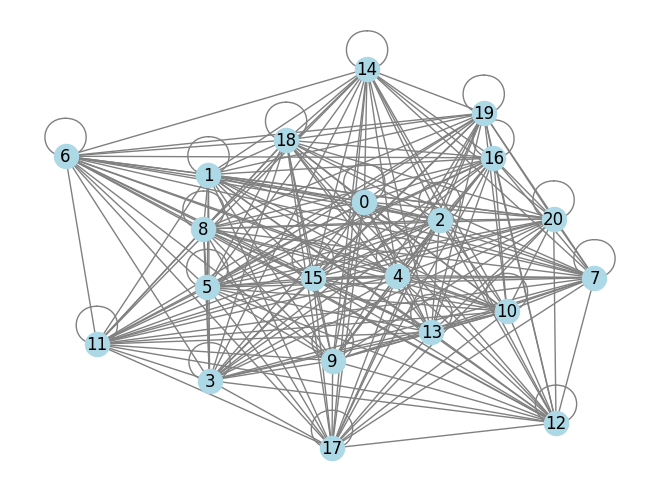

In [116]:
plot_graph(adj_numpy)

In [120]:
for item in set_streaming:
    print(item)

['0571df03-f652-431b-b14c-5b963ca745df', 'Visionular is a next-generation video encoding and image processing technology software company We build solutions that harness the power of AI and ML using advanced codec technologies so that your video app or streaming service can delight more users.We understand that delivering video at scale with high quality requires a tremendous breadth ofimage science codec development and optimization and video streaming expertise The kind of knowledge that can only get amassed over multiple decades of tackling successfully the biggest video challenges.For this reason we ’ ve retained the brightest minds from Google Apple Nokia Research Kingsoft Arcsoft Intervideo and other well-established video innovators to address the problem all video streaming engineers face- how to produce the highest quality video at the lowest bitrate.Our team wakes up excited to deliver world-leading video solutions and services in the field of video encoding transcoding proce